# [Clustering Tutorial](https://machinelearningmastery.com/clustering-algorithms-with-python/)

# Tutorial Overview
   1. [Clustering](#1)
   2. Clustering Algorithms
   3. Examples of Clustering Algorithms
       1. Library Installation
       2. Clustering Dataset
       3. Affinity Propagation
       4. Agglomerative Clustering
       5. BIRCH
       6. DBSCAN
       7. K-Means
       8. Mini-Batch K-Means
       9. Mean Shift
       10. OPTICS
       11. Spectral Clustering
       12. Gaussian Mixture Model

# Clustering<a id="1"></a>

**Clustering** 또는 **cluster analysis**이란?
   - 비교사 학습  
   - 예측할 클래스가 없는 경우가 아니라, 인스턴스가 본연적으로 그룹화되어 분할되어야 할 때 적용
   - 모든 데이터에 가장 적합한 알고리즘은 없다. 따라서, 다양한 군집화 알고리즘과 각 알고리즘에 대한 구성을 알고 있는 것이 좋음
   - 결과에 대한 평가가 어려움

# Clustering Algorithms

   - 인스턴스들 사이의 거리 또는 유사성을 측정하여 밀집 지역을 발견
   - 적절한 결과가 도출되어질 때까지 군집화되어진 군집들에 대한 주관적인 평가가 알고리즘 구성을 바꾸는 피드백으로 전달되는 반복적인 과정
   - 통제된 실험을 하지않고 최고의 알고리즘을 찾는 쉬운 방법은 없음

# Examples of Clustering Algorithms

이제 인기있는 10개의 클러스터링 알고리즘을 배워보자

## Library Installation

**Anaconda** 환경이라면, 이미 설치되어 있는 scikit-learn 라이브러리를 업데이트 해주자.
```
conda update scikit-learn
```

만약 **python** 환경이라면,
```
pip install skikit-learn
```

## Clustering Dataset

이 곳에서는 클러스터링을 이용하여 분류되어진 결과값들을 쉽게 볼 수 있도록 2차원 데이터로 나타낼 것이며, scatter plot을 이용하여 분류된 데이터를 시각화함으로써 알고리즘 별 결과를 확인할 것이다.

In [2]:
# synthetic classification dataset
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

2개의 column을 가진 1000개의 데이터셋을 만들었다.

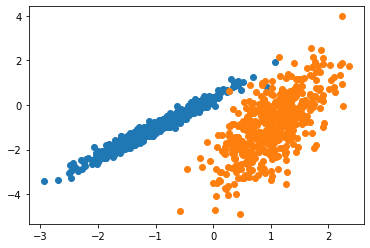

In [4]:
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Affinity Propagation

**Affinity Propagation** 알고리즘이란, 인스턴스가 자신을 대표할 수 있는 유사도가 높은 인스턴스에 투표<sup>Real-valued message</sup>합니다. 알고리즘이 수렴하면, 각 대표와 투표한 인스턴스가 군집을 형성하는 알고리즘입니다.

특징
   - 군집의 개수를 지정할 필요가 없음
   - 계산 복잡도는 O(n<sup>2</sup>)
   - 대규모 데이터에 적합하지 않음

In [5]:
from sklearn.cluster import AffinityPropagation

C:\Users\bauser01\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


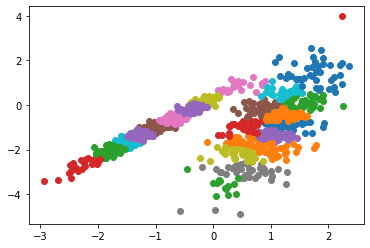

In [7]:
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
pyplot.show()

## Agglomerative Clustering

**Agglomerative Clustering**는 군집 계층을 각각의 인스턴스 하나씩으로 시작하여, 원하는 숫자의 군집으로 수렴할 때 까지 군집을 합병하는 알고리즘

특징
   - Agglomerative Clustering의 결과는 이진트리의 형태를 띔
   - 인스턴스 간의 거리를 담은 희소 행렬을 연결 행렬로 전달하면, 대규모 데이터셋으로 확장할 수 있음

In [8]:
from sklearn.cluster import AgglomerativeClustering

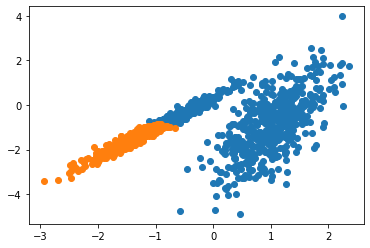

In [9]:
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## BIRCH<sup>balanced iterative reducing and clustering using hierarchies</sup>